# Student Performance Classifier (Project 2)

##### K-Nearest Neighbors


##### Created piepelines to scale data and test optimal k_neighbors and the distance metrics. 

-Nrepesh Joshi

• Find the “optimal” number of neighbors to use. <br>
• Also, check if the distance metric is important. Do this all using the L1 norm, then do it using the usual L2 norm, then do it using the L∞ norm. See if the optimal k significantly differs between the norms.


•	L1 norm (Manhattan):	|| (x1,y1), (x2,y2) ||1	= |x1 – x2| + |y1 – y2|<br>
•	L2 norm (Euclidean):	|| (x1,y1), (x2,y2) ||2 = sqrt( (x1 – x2)^2 + (y1 – y2)^2 )<br>
•	L∞ norm (Chebyshev):	|| (x1,y1), (x2,y2) ||∞	= max{ (x1 – x2), (y1 – y2) }<br>


### Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

We will train a model and classify new data(Bob.csv).

Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
2 sex - student's sex (binary: 'F' - female or 'M' - male)<br>
3 age - student's age (numeric: from 15 to 22)<br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary 
education or 4 â€“ higher education)<br>
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - extra educational support (binary: yes or no)<br>
17 famsup - family educational support (binary: yes or no)<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19 activities - extra-curricular activities (binary: yes or no)<br>
20 nursery - attended nursery school (binary: yes or no)<br>
21 higher - wants to take higher education (binary: yes or no)<br>
22 internet - Internet access at home (binary: yes or no)<br>
23 romantic - with a romantic relationship (binary: yes or no)<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - number of school absences (numeric: from 0 to 93)<br>

##### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)<br>
31 G2 - second period grade (numeric: from 0 to 20)<br>
32 G3 - final grade (numeric: from 0 to 20, output target)



## Exploratory Data Analysis 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("student-por.csv",sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### We will convert all the object categorical values to numerical binary values

This is possible in this data set because the categorical variables were either binary or nominal. We could encode them using sklearn.preprocessing's LabelEncoder. We do not need to remove any columns and now can proceed with training the KNearestNeighbors model with all numerical values. 

In [5]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [6]:
df_change = df.select_dtypes(include=['object'])      # Will include all the categorical columns 
df_change.head(1)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no


In [7]:
for column in df_change:
    df[column] = lb.fit_transform(df[column])

In [8]:
df = df.drop(columns = ['G2','G1'], axis = 1) # Remove the other grades as we will not use them to train the model 
df = df.select_dtypes(exclude=['object'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,4,11
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,2,11
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,6,12
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,0,14
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,0,13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int32
 16  famsup      649 non-null    int32
 17  paid        649 non-null    int32
 18  activities  649 non-null    int32
 19  nursery     649 non-null    int32
 20  higher      649 non-null    int3

We see the dtypes are either int32 or int64

In [10]:
def categorize(col):
    if col >= 18:
        return 'Excel'
    elif col >= 14 and col < 18:
        return 'Satisfactory'
    else:
        return 'Unsatisfactory'

We categorize the Grades 'G3' as follows: G3>=18 --> "Excel", 14<=G3<18 --> "Satisfactory", and G3<14 --> "Unsatisfactory"

In [11]:
df['G3'] = df['G3'].apply(lambda x: categorize(x))

In [12]:
df.head()['G3']

0    Unsatisfactory
1    Unsatisfactory
2    Unsatisfactory
3      Satisfactory
4    Unsatisfactory
Name: G3, dtype: object

## Creating pipeline for Scaling and KNN

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.neighbors import KNeighborsClassifier as KNN

In [14]:
y = df['G3']
X = df.drop(columns = ['G3'], axis = 1)

Temporary pipeline with k = 1 for each distance metric 

In [15]:
scaling_pipeline_k1_Manhattan = Pipeline([('scale', MMS()),('predict', KNN(n_neighbors = 1,  metric = 'manhattan'))])
scaling_pipeline_k1_Euclidean = Pipeline([('scale', MMS()),('predict', KNN(n_neighbors = 1,  metric = 'euclidean'))])
scaling_pipeline_k1_Chebyshev = Pipeline([('scale', MMS()),('predict', KNN(n_neighbors = 1,  metric = 'chebyshev'))])

## Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores = cross_val_score(scaling_pipeline_k1_Manhattan, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The pipeline with k = 1 and Manhattan metric scored an average accuracy of {0:.1f}%".format(average_accuracy))

The pipeline with k = 1 and Manhattan metric scored an average accuracy of 62.0%


In [18]:
scores = cross_val_score(scaling_pipeline_k1_Euclidean, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The pipeline with k = 1 and Euclidean metric scored an average accuracy of {0:.1f}%".format(average_accuracy))

The pipeline with k = 1 and Euclidean metric scored an average accuracy of 62.6%


In [19]:
scores = cross_val_score(scaling_pipeline_k1_Chebyshev, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The pipeline with k = 1 and Chebyshev metric scored an average accuracy of {0:.1f}%".format(average_accuracy))

The pipeline with k = 1 and Chebyshev metric scored an average accuracy of 58.9%


##### We notice here that the distance metic with the highest average accuracy and with 1 k neighbor is Euclidean with 62.6%

# Making the model better

Using average scores to see how scores changes as n_neighbors increases for each distance metrics 

### 1. Manhattan distance

In [20]:
avg_scores_manhattan = []
for n in range(1,30):
    estimator = KNN(n_neighbors=n, metric = 'manhattan')
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores_manhattan.append(np.mean(scores))

Text(0, 0.5, 'Avg_scores_manhattan')

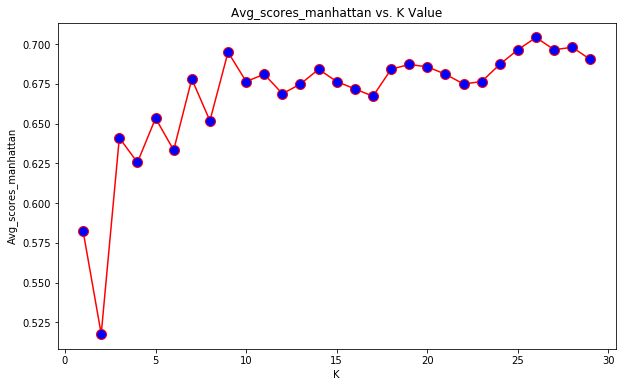

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),avg_scores_manhattan,color = 'red', marker='o',markerfacecolor='blue',markersize=10)
plt.title('Avg_scores_manhattan vs. K Value')
plt.xlabel('K')
plt.ylabel('Avg_scores_manhattan')

### 2. Euclidean distance

In [22]:
avg_scores_euclidean = []
for n in range(1,30):
    estimator = KNN(n_neighbors=n, metric = 'euclidean')
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores_euclidean.append(np.mean(scores))

Text(0, 0.5, 'Avg_scores_euclidean')

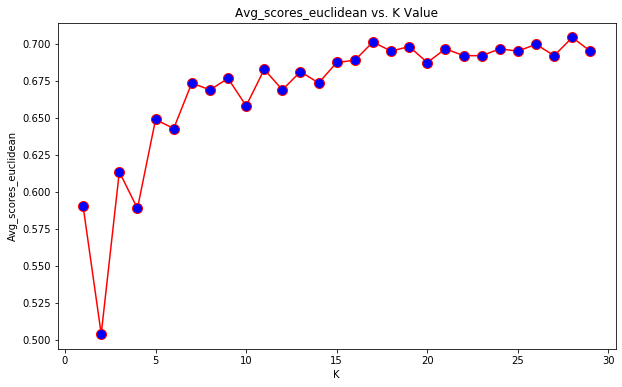

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),avg_scores_euclidean,color = 'red', marker='o',markerfacecolor='blue',markersize=10)
plt.title('Avg_scores_euclidean vs. K Value')
plt.xlabel('K')
plt.ylabel('Avg_scores_euclidean')

### 3. Chebyshev distance

In [24]:
avg_scores_chebyshev = []
for n in range(1,30):
    estimator = KNN(n_neighbors=n, metric = 'chebyshev')
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores_chebyshev.append(np.mean(scores))

Text(0, 0.5, 'Avg_scores_chebyshev')

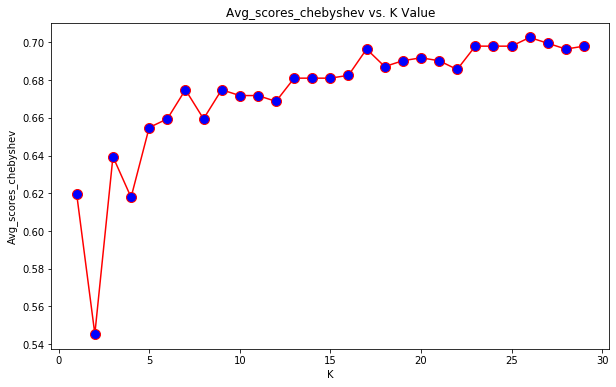

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),avg_scores_chebyshev,color = 'red', marker='o',markerfacecolor='blue',markersize=10)
plt.title('Avg_scores_chebyshev vs. K Value')
plt.xlabel('K')
plt.ylabel('Avg_scores_chebyshev')

##### We notice here that for each distance metic the highest average accuracy is when n_neighbors is 27.

## Cross validation score Again
##### Running all pipelines with n_neighbors = 27

In [26]:
scaling_pipeline_k27_Manhattan = Pipeline([('scale', MMS()),('predict', KNN(n_neighbors = 27,  metric = 'manhattan'))])
scaling_pipeline_k27_Euclidean = Pipeline([('scale', MMS()),('predict', KNN(n_neighbors = 27,  metric = 'euclidean'))])
scaling_pipeline_k27_Chebyshev = Pipeline([('scale', MMS()),('predict', KNN(n_neighbors = 27,  metric = 'chebyshev'))])

In [27]:
scores = cross_val_score(scaling_pipeline_k27_Manhattan, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The pipeline with k = 27 and Manhattan metric scored an average accuracy of {0:.1f}%".format(average_accuracy))

The pipeline with k = 27 and Manhattan metric scored an average accuracy of 67.6%


In [28]:
scores = cross_val_score(scaling_pipeline_k27_Euclidean, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The pipeline with k = 27 and Euclidean metric scored an average accuracy of {0:.1f}%".format(average_accuracy))

The pipeline with k = 27 and Euclidean metric scored an average accuracy of 70.3%


In [29]:
scores = cross_val_score(scaling_pipeline_k27_Chebyshev, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The pipeline with k = 27 and Chebyshev metric scored an average accuracy of {0:.1f}%".format(average_accuracy))

The pipeline with k = 27 and Chebyshev metric scored an average accuracy of 58.6%


##### We notice here that the distance metic with the highest average accuracy is Euclidean (k_neighbors = 27) with 70.3%

## Predicting data using the optimal pipeline

In [30]:
bob = pd.read_csv("bob.csv")

In [31]:
for column in bob.select_dtypes(include=['object']):
    bob[column] = lb.fit_transform(bob[column])

In [32]:
bob.head()                              #New data for prediction

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,0,0,1,1,0,0,...,0,0,0,4,3,2,1,2,4,0


In [33]:
bob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1 non-null      int32
 1   sex         1 non-null      int32
 2   age         1 non-null      int64
 3   address     1 non-null      int32
 4   famsize     1 non-null      int32
 5   Pstatus     1 non-null      int32
 6   Medu        1 non-null      int64
 7   Fedu        1 non-null      int64
 8   Mjob        1 non-null      int32
 9   Fjob        1 non-null      int32
 10  reason      1 non-null      int32
 11  guardian    1 non-null      int32
 12  traveltime  1 non-null      int64
 13  studytime   1 non-null      int64
 14  failures    1 non-null      int64
 15  schoolsup   1 non-null      int32
 16  famsup      1 non-null      int32
 17  paid        1 non-null      int32
 18  activities  1 non-null      int32
 19  nursery     1 non-null      int32
 20  higher      1 non-null      int32
 2

In [40]:
model1 = scaling_pipeline_k27_Manhattan.fit(X,y)
model2 = scaling_pipeline_k27_Euclidean.fit(X,y)
model3 = scaling_pipeline_k27_Chebyshev.fit(X,y)

In [45]:
bob_predicted_manhattan = model1.predict(bob)
bob_predicted_euclidean = model2.predict(bob)
bob_predicted_chebyshev = model3.predict(bob)
print("Prediction for manhattan, k = 27 is {[0]}".format(bob_predicted_manhattan))
print("Prediction for euclidean, k = 27 is {[0]}".format(bob_predicted_euclidean))
print("Prediction for chebyshev, k = 27 is {[0]}".format(bob_predicted_chebyshev))

Prediction for manhattan, k = 27 is Unsatisfactory
Prediction for euclidean, k = 27 is Unsatisfactory
Prediction for chebyshev, k = 27 is Unsatisfactory


It looks like Bob was classified to be 'Unsatisfactory' from our KNN algorithm which used k_neighbors as 27. 

We can conclude that both the distance metric and optimal k_neighbors were necessary for the increased accuracy of our model. 

The model increased by 7.7% when we changed k from 1 to 27 using the Euclidean distance.